In [1]:
import pandas as pd

%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt

import numpy as np
import sys
import os
from collections import defaultdict

import re
from nltk.tokenize import sent_tokenize,word_tokenize

import datetime

import seaborn as sns

In [2]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')

In [3]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')

In [4]:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',

'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',

'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

items = pd.read_csv('ml-100k/u.item', sep='|', names=i_cols,

encoding='latin-1')

In [5]:
print(users.shape)

users.head(10)

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [9]:
print(ratings.shape)

ratings.head(10)

(100000, 4)


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [6]:
print(items.shape)

items.head()

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_train = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')

ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')

ratings_train.shape, ratings_test.shape

((90570, 4), (9430, 4))

In [8]:
n_users = ratings.user_id.unique().shape[0]

n_items = ratings.movie_id.unique().shape[0]


In [9]:
#data matrix for users-movie items
data_matrix = np.zeros((n_users,n_items))
for line in ratings.itertuples():
    data_matrix[line[1]-1,line[2]-1]=line[3]
print(data_matrix)

[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [96]:
from sklearn.metrics.pairwise import pairwise_distances 
user_similarity = pairwise_distances(data_matrix, metric='cosine')
item_similarity = pairwise_distances(data_matrix.T, metric='cosine')

In [113]:
pd.DataFrame(data_matrix)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
itemsim_matrix=pd.DataFrame(item_similarity)

In [97]:
itemsim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.597618,0.669755,0.545062,0.713286,0.883656,0.379021,0.518886,0.503712,0.726065,...,0.964613,1.0,1.000000,1.000000,0.964613,1.0,1.0,1.0,0.952817,0.952817
1,0.597618,0.000000,0.726931,0.497429,0.681164,0.916437,0.616597,0.662998,0.744748,0.828918,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.921701,0.921701
2,0.669755,0.726931,0.000000,0.675134,0.787043,0.893278,0.627079,0.799206,0.726331,0.841896,...,1.000000,1.0,1.000000,1.000000,0.967708,1.0,1.0,1.0,1.000000,0.903125
3,0.545062,0.497429,0.675134,0.000000,0.665761,0.909692,0.510717,0.509764,0.580956,0.747439,...,1.000000,1.0,0.905978,0.905978,0.962391,1.0,1.0,1.0,0.943587,0.924782
4,0.713286,0.681164,0.787043,0.665761,0.000000,0.962701,0.665231,0.740839,0.727552,0.944547,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,0.905789


In [16]:
usersim_matrix=pd.DataFrame(user_similarity)
usersim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,0.000000,0.833069,0.952540,0.935642,0.621525,0.569761,0.559633,0.680928,0.921862,0.623456,...,0.630473,0.880518,0.725124,0.810295,0.802674,0.881905,0.685928,0.851383,0.820492,0.601825
1,0.833069,0.000000,0.889409,0.821879,0.927021,0.754157,0.892672,0.896656,0.838952,0.840138,...,0.843014,0.692058,0.641211,0.575954,0.680111,0.771417,0.773210,0.838515,0.827732,0.894202
2,0.952540,0.889409,0.000000,0.655849,0.978755,0.927585,0.933863,0.916940,0.938960,0.934849,...,0.968125,0.957247,0.836171,0.930962,0.875755,0.973729,0.838110,0.898757,0.866584,0.973444
3,0.935642,0.821879,0.655849,0.000000,0.968196,0.931956,0.908770,0.811940,0.898716,0.939141,...,0.947893,0.963216,0.866885,0.806529,0.853942,0.969862,0.803142,0.847959,0.829914,0.941248
4,0.621525,0.927021,0.978755,0.968196,0.000000,0.762714,0.626400,0.751070,0.943153,0.798573,...,0.661206,0.919420,0.905076,0.920221,0.851393,0.928541,0.760045,0.860405,0.847503,0.686059


In [100]:
itemsim_matrix[:10].head(10)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.597618,0.669755,0.545062,0.713286,0.883656,0.379021,0.518886,0.503712,0.726065,...,0.964613,1.000000,1.000000,1.000000,0.964613,1.0,1.0,1.0,0.952817,0.952817
1,0.597618,0.000000,0.726931,0.497429,0.681164,0.916437,0.616597,0.662998,0.744748,0.828918,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.921701,0.921701
2,0.669755,0.726931,0.000000,0.675134,0.787043,0.893278,0.627079,0.799206,0.726331,0.841896,...,1.000000,1.000000,1.000000,1.000000,0.967708,1.0,1.0,1.0,1.000000,0.903125
3,0.545062,0.497429,0.675134,0.000000,0.665761,0.909692,0.510717,0.509764,0.580956,0.747439,...,1.000000,1.000000,0.905978,0.905978,0.962391,1.0,1.0,1.0,0.943587,0.924782
4,0.713286,0.681164,0.787043,0.665761,0.000000,0.962701,0.665231,0.740839,0.727552,0.944547,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,0.905789
5,0.883656,0.916437,0.893278,0.909692,0.962701,0.000000,0.860383,0.916124,0.848936,0.796903,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000
6,0.379021,0.616597,0.627079,0.510717,0.665231,0.860383,0.000000,0.576485,0.472538,0.681377,...,1.000000,0.948502,1.000000,1.000000,0.948502,1.0,1.0,1.0,0.948502,0.948502
7,0.518886,0.662998,0.799206,0.509764,0.740839,0.916124,0.576485,0.000000,0.575571,0.732236,...,1.000000,0.917967,0.934373,0.934373,0.917967,1.0,1.0,1.0,0.917967,1.000000
8,0.503712,0.744748,0.726331,0.580956,0.727552,0.848936,0.472538,0.575571,0.000000,0.711486,...,1.000000,1.000000,0.942640,0.942640,0.928300,1.0,1.0,1.0,0.942640,0.928300
9,0.726065,0.828918,0.841896,0.747439,0.944547,0.796903,0.681377,0.732236,0.711486,0.000000,...,1.000000,1.000000,0.919736,0.919736,1.000000,1.0,1.0,1.0,1.000000,1.000000


F:\Anacoda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


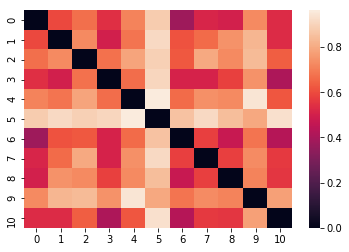

In [18]:
sns.heatmap(itemsim_matrix.ix[:10,:10])

F:\Anacoda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


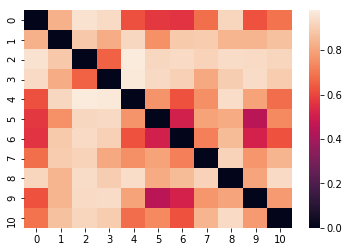

In [19]:
sns.heatmap(usersim_matrix.ix[:10,:10])

In [23]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred 

In [50]:
rsort=ratings.sort_values(by="movie_id",ascending=True)

In [86]:
#mean for each movie_id
df1=rsort.loc[:,'movie_id':'rating'].groupby(['movie_id']).mean()
df1=df1.rename(columns={"rating":"mean"})

In [87]:
#count for each movie_id
df2=rsort.loc[:,'movie_id':'rating'].groupby(['movie_id']).count()
df2=df2.rename(columns={"rating":"rating times"})

In [88]:
#median for each movie_id
df3=rsort.loc[:,'movie_id':'rating'].groupby(['movie_id']).median()
df3=df3.rename(columns={"rating":"median"})

In [119]:
df=pd.concat([df2,df1,df3],axis=1).reset_index()
#df=df.sort_values(by="rating times",ascending=False)
df

,movie_id,rating times,mean,median
0,1,452,3.878319,4.0
1,2,131,3.206107,3.0
2,3,90,3.033333,3.0
3,4,209,3.550239,4.0
4,5,86,3.302326,3.0
5,6,26,3.576923,4.0
6,7,392,3.798469,4.0
7,8,219,3.995434,4.0
8,9,299,3.896321,4.0
9,10,89,3.831461,4.0


In [101]:
#
user_prediction = predict(data_matrix, user_similarity, type='user')
item_prediction = predict(data_matrix, item_similarity, type='item')

In [105]:
import turicreate

ModuleNotFoundError: No module named 'turicreate'

In [107]:
class MF():

    # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
        self.sgd()
        mse = self.mse()
        training_process.append((i, mse))
        if (i+1) % 20 == 0:
            print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and moive j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [108]:
R= np.array(ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0))

In [116]:
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())


Iteration: 100 ; error = 337.6131

P x Q:
[[3.66591917 3.4997572  3.49024296 ... 3.544374   3.56280636 3.53734071]
 [3.6731819  3.53160275 3.49894857 ... 3.53065617 3.53804666 3.55248115]
 [3.6091374  3.44685313 3.44063876 ... 3.48119976 3.49975932 3.50306054]
 ...
 [3.66945693 3.48308803 3.50869113 ... 3.56904447 3.53936316 3.54072024]
 [3.69432502 3.54807509 3.53360541 ... 3.61099891 3.59796682 3.56843718]
 [3.65291939 3.47329477 3.48256774 ... 3.50097741 3.50058257 3.4984644 ]]


In [114]:
pd.DataFrame(data_matrix)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
pd.DataFrame(mf.full_matrix())

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,3.665919,3.499757,3.490243,3.558918,3.527125,3.548264,3.628875,3.657642,3.643071,3.568596,...,3.549013,3.543106,3.555707,3.547557,3.545308,3.542827,3.542317,3.544374,3.562806,3.537341
1,3.673182,3.531603,3.498949,3.534332,3.515064,3.533246,3.639249,3.637331,3.624994,3.571125,...,3.544006,3.539059,3.520298,3.527818,3.544725,3.547020,3.542467,3.530656,3.538047,3.552481
2,3.609137,3.446853,3.440639,3.483754,3.466152,3.497383,3.588685,3.569763,3.582216,3.512714,...,3.502971,3.501358,3.514863,3.516462,3.486627,3.483560,3.514487,3.481200,3.499759,3.503061
3,3.685683,3.518434,3.516392,3.559599,3.528252,3.575203,3.624661,3.657133,3.629690,3.585800,...,3.546215,3.538661,3.553653,3.555711,3.530864,3.526182,3.547438,3.570938,3.546403,3.529514
4,3.547457,3.405383,3.374353,3.418876,3.422178,3.423599,3.488017,3.535500,3.505318,3.454360,...,3.428479,3.412226,3.435274,3.435237,3.408222,3.426239,3.434177,3.429986,3.452679,3.403407
5,3.662908,3.513736,3.509175,3.550225,3.533697,3.554451,3.619083,3.633269,3.644608,3.566151,...,3.544727,3.535869,3.550154,3.545011,3.542579,3.537429,3.551814,3.537152,3.543062,3.551209
6,3.804420,3.617202,3.619377,3.668740,3.645327,3.670535,3.749567,3.756265,3.766393,3.692054,...,3.663169,3.673868,3.662543,3.654037,3.654033,3.661789,3.649984,3.671410,3.658093,3.652661
7,3.675562,3.504753,3.491530,3.544914,3.526879,3.538427,3.620511,3.642176,3.629219,3.560465,...,3.529166,3.538825,3.553730,3.519223,3.526398,3.557597,3.538626,3.536088,3.549660,3.537257
8,3.671538,3.506365,3.495720,3.571423,3.511058,3.546028,3.641643,3.641948,3.627105,3.569581,...,3.548240,3.520358,3.559931,3.541092,3.542542,3.541394,3.524276,3.541620,3.561285,3.529248
9,3.783865,3.613916,3.614512,3.633735,3.625712,3.653214,3.715453,3.756249,3.729408,3.667457,...,3.623023,3.636805,3.629649,3.622047,3.626377,3.643742,3.631426,3.639296,3.625707,3.637516
